# **Content**
1. [Load and Check Data](#1)
1. [Veriable Description](#2)
      * [Univariate Veriable Analysis](#3)
        * [Categorical Veriable](#4)
        * [Numeric Veriable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #plt.style.available
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="1"></a>
# Load and Check data

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_passengerId = test_df[["PassengerId"]]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Value
Find Missing Value
Fill Missing Value<a id="2"></a>
# Veriable Description
1. PassengerId: Uniqeu id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name
1. Sex: gender of passenger
1. Age: age of passenger
1. SibSp: number of siblings/spouses
1. Parch: number of partens
1. Ticket: ticket number
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Age, Fare
* int64(5): PassengerId, Surviverd, Pclass, SibSp, Parch
* object(5): Name, Sex, Ticket, Cabin, Embarked

<a id="3"></a>
# Univariate Veriable Analysis
* Categorical Veriable: Survived, Sex, Pclass, Name, SibSp, Parch, Cabin, Embarked, Ticket
* Numeric Veriable: PassengerId, Fare, Age

<a id="4"></a>
## Categorical Veriable


In [8]:
def bar_plot(veriable):
    """
    input: veriable ex:"sex"
    output: bar plot & value count
    """
    #get feature
    var = train_df[veriable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(veriable)
    plt.show()
    
    print(f"{veriable}\n{varValue}")
    

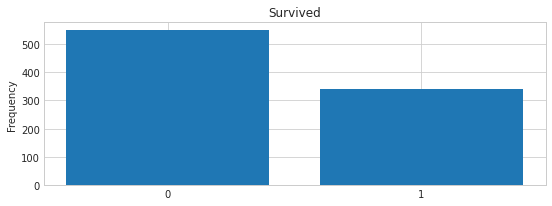

Survived
0    549
1    342
Name: Survived, dtype: int64


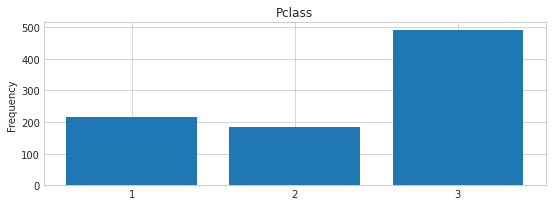

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


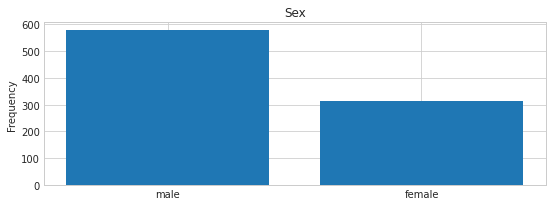

Sex
male      577
female    314
Name: Sex, dtype: int64


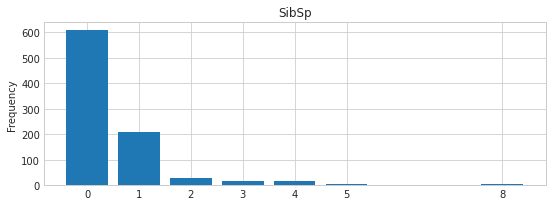

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


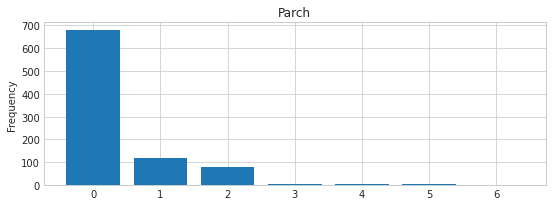

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


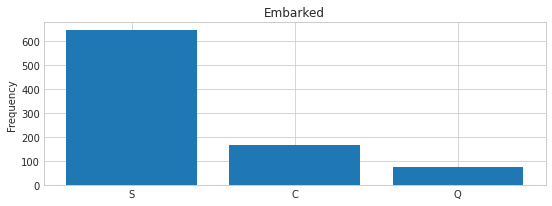

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
category1 = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for c in category1:
    bar_plot(c)

In [10]:
category2 = ["Cabin","Ticket","Cabin"]
for c in category2:
    print(f"Category= {c}\n{train_df[c].value_counts()}")

Category= Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
Category= Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
Category= Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


<a id="5"></a>
## Numeric Veriable

In [11]:
numericVar = ["Age","Fare","PassengerId"]

In [12]:
def plot_hist(veriable):
    """
    input: veriable ex:"cabin"
    output: histogram graph
    """
    plt.hist(train_df[veriable],bins=50)
    plt.xlabel(veriable)
    plt.ylabel("Frequency")
    plt.title("Histogram")
    plt.show()

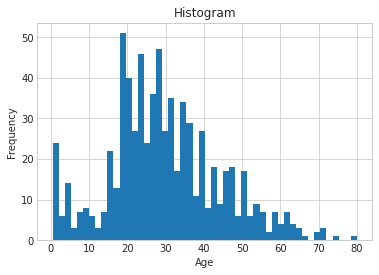

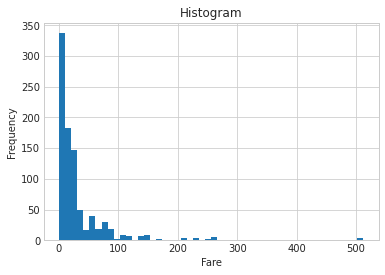

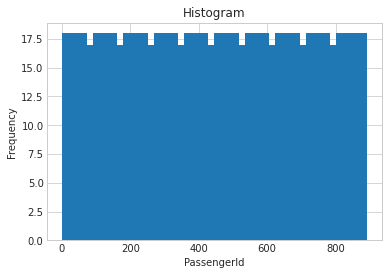

In [13]:
for hist in numericVar:
    plot_hist(hist)

<a id="6"></a>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

## P class vs Survived

In [14]:
train_df[["Pclass","Survived"]].groupby("Pclass",as_index=False).mean().sort_values("Survived")

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


## Sex vs Survived

In [15]:
train_df[["Sex","Survived"]].groupby("Sex",as_index=False).mean().sort_values("Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## SibSp - Survived

In [16]:
train_df[["SibSp","Survived"]].groupby("SibSp",as_index=False).mean().sort_values("Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Parch - Survived

In [17]:
train_df[["Parch","Survived"]].groupby("Parch",as_index=False).mean().sort_values("Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id="7"></a>
# Outlier Detection

In [18]:
def detect_outliers(df,features):
    outlier_indices = []
    for c in features: 
        #1st Quartile
        Q1 = np.percentile(df[c],25)
        #3st Quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier Step
        outlier_step = IQR * 1.5
        #detect outlier
        outlier_list = df[(df[c] < (Q1 - outlier_step)) | (df[c] > (Q3 + outlier_step))].index
        #store
        outlier_indices.extend(outlier_list)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [i for i,v in outlier_indices.items() if v > 2]
    
    return multiple_outliers

In [19]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
# Drop Outliers
train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id="8"></a>
# Missing Value
 * Find Missing Value
 * Fill Missing Value

In [21]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="9"></a>
## Find Missing Value

In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<a id="10"></a>
## Fill Missing Value
* Embarked has 2 missing value
* Fare has 1 missing value

In [25]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


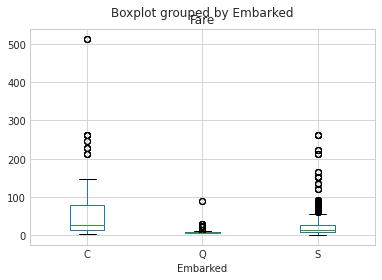

In [26]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [27]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
# Check
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [29]:
train_df[train_df["Pclass"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
train_df[train_df["Pclass"] == 3]["Fare"].mean()

13.302888700564973

In [31]:
train_df["Fare"] = train_df["Fare"].fillna(train_df[train_df["Pclass"] == 3]["Fare"].mean())

In [32]:
# Check
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
